# Ejercicios Alumno

## Contenido


Este notebook contiene una serie de ejercicios en la cual el alumno puede poner en práctica las técnicas explicadas en los vídeos. Para estos ejercicios se usará un conjunto de datos obtenidos de Kaggle. En este caso, el conjunto de datos describe las valoraciones de un conjunto de libros:

- Enlace: https://www.kaggle.com/jealousleopard/goodreadsbooks

El fichero original (``books.csv``) se puede bajar desde este enlace. Ya que se trata de una base de datos muy estable y limpia, para estos ejercios no usaremos este fichero tal cual. En ese sentido, usaremos un versión pre-procesada de estos datos que se encuentra en la carpeta raiz de este notebook bajo el nombre ``books_edit.csv``. Esta fuente tipicamente sirve para practicar el modelaje de un modelo supervisado de regresión, en el cual la variable objectivo es la valoración del libro (``average_rating``) usando como predictores una selección de las columnas restantes.

**INSTRUCCIONES**

- La idea es poner en práctica lo aprendido en los vídeos teóricos y las demos.
- Para ello, se ha creado una serie de ejercicios.
- Cada ejercicio viene precedido por un bloque de texto que empieza con la palabra **Ejercicio:**, seguido por una breve descripción del mismo.
- En las soluciones, parte del código que describe la solución viene pre-rellenado, dejando huecos marcados con ``----`` en los cuales el alumno tendrá que completar el código.

## Ejercicios

### Crear un conjunto de Entrenamiento y Validación

Antes de empezar a trabajar con los datos de Kaggle, practicaremos la creación de matrices de entrenamiento y validación. Para ello, al igual que en los vídeos, generaremos un conjunto de datos ficticio:

In [1]:
import numpy as np
import pandas as pd

# Creamos una semilla para que la aleatoriedad de los números sea reproducible
np.random.seed(10)

# Definimos el número de filas que queremos en nuetras matriz (1000).
rows = 10000

# Creamos 4 columnas y 'rows' filas de predictores
df_dummy_pred = pd.DataFrame(np.random.randint(0,100,size=(rows, 4)), columns = ['x1', 't2', 'b3', 'y4'])

# Creamos un vector de nuestra variable objetivo
df_dummy_target = pd.DataFrame(np.random.randint(0,2,size=(rows, 1)), columns= ['objetivo'])

# Concatenamos las dos matrices en una matriz final (dimensión: 1000, 5)
df_dummy = pd.concat([df_dummy_pred.reset_index(drop=True), df_dummy_target], axis=1)

print(df_dummy.shape)
print(df_dummy.columns)
print('--------------------------')
print(df_dummy.head(5))

(10000, 5)
Index(['x1', 't2', 'b3', 'y4', 'objetivo'], dtype='object')
--------------------------
   x1  t2  b3  y4  objetivo
0   9  15  64  28         0
1  89  93  29   8         1
2  73   0  40  36         1
3  16  11  54  88         1
4  62  33  72  78         1


**Ejercicio**: Separa los datos en un conjunto de entrenamiento y otro de test donde el conjunto de test contiene el `25%` de los datos. Usa un `random_state` igual a `33` y `stratify` igual a `y`. Una vez generadas las matrices/vectores, imprime sus tipos y dimensiones en consola (Reemplaza`----` con el código adecuado)

In [2]:
from sklearn.model_selection import train_test_split

# Creamos nuestra matriz de predictores eliminando la columna de nuestra variable objetivo.
X = df_dummy.drop(columns=['objetivo'], inplace=False)

# Creamos objeto tipo serie con nuestra variable objetivo)
y = df_dummy.objetivo

# Generamos nuestros conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=33)

# Imprimimos el tipo de cada matriz/vector en concola
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

print('--------------------------------------------')


# Imprimimos la dimensión de cada matriz/vector en concola
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
--------------------------------------------
(7500, 4)
(2500, 4)
(7500,)
(2500,)


### Análisis Exploratorio

En un primer paso cargaremos los datos. Se trata del fichero `books_edit.csv` que se encuentra en la misma carpeta que este notebook. Como paso adicional, eliminamos ciertas columnas que no se usarán durante los ejercicios.

In [3]:
# Importar la librería pandas como pd
import pandas as pd
import os
# Cargamos los datos
os.getcwd()
os.chdir('/content/sample_data')
df = pd.read_csv('books_edit.csv', sep = ";")

# Eliminamos columnas que no usaremos en los ejercicios que veremos a continuación.
cols_to_delete = ['isbn',  'isbn13', 'publication_date', 'publisher']
df = df.drop(cols_to_delete, axis = 1)
print(df.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')


## Exploración básica de los Datos

### Ejercicio 1

**Ejercicio**: ¿Cuál es la dimensión de la matriz? (Reemplaza `----` con el código adecuado)

In [4]:
dim = df.shape

print(dim)

(11072, 8)


### Ejercicio 2

**Ejercicio**: Imprime las primas 3 filas de la matriz (Reemplaza `----` con el código adecuado)

In [5]:
df_3 = df.head(3)

print(df_3)

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   

                      authors  average_rating language_code  num_pages  \
0  J.K. Rowling/Mary GrandPré            4.57           eng      652.0   
1  J.K. Rowling/Mary GrandPré            4.49           eng      870.0   
2                J.K. Rowling            4.42           eng      352.0   

   ratings_count  text_reviews_count  
0      2095690.0               27591  
1      2153167.0               29221  
2         6333.0                 244  


### Ejercicio 3

**Ejercicio**: ¿Cantos libros únicos hay en el matriz (`bookID`)? Para ello, usa la función `unique()` (Reemplaza `----` con el código adecuado).

In [6]:
unique_bookID = len(df['bookID'].unique())

print(unique_bookID)#Un id para cada libro

11072


### Ejercicio 4

**Ejercicio**: Genera una gráfica de barras con el fin de analizar al presencia de valores perdidos (Reemplaza `----` con el código adecuado). ¿Qué variables contienen valores perdidos?

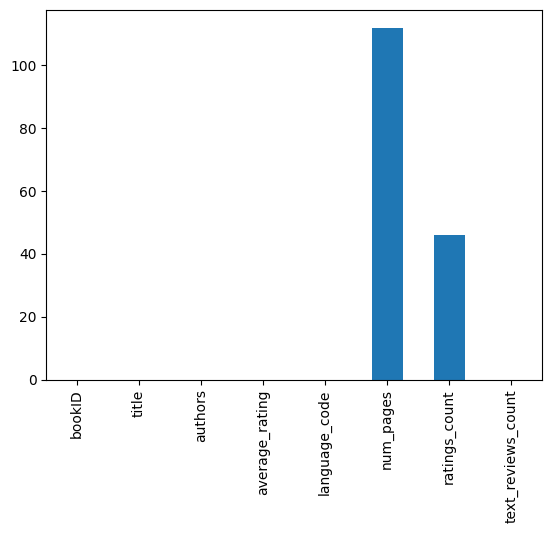

In [7]:
df.isnull().sum().plot(kind="bar");

### Ejercicio 5

**Ejercicio**: Usa el método `pairplot` de la librería `seaborn` con el fin de crear una gráfica que nos muestre tanto las distribuciones como las correlaciones mutuas de las variables `num_pages` y `average_rating`. ¿Hay correlación entre la valoración de un libro y el número de páginas? (Reemplaza `----` con el código adecuado)

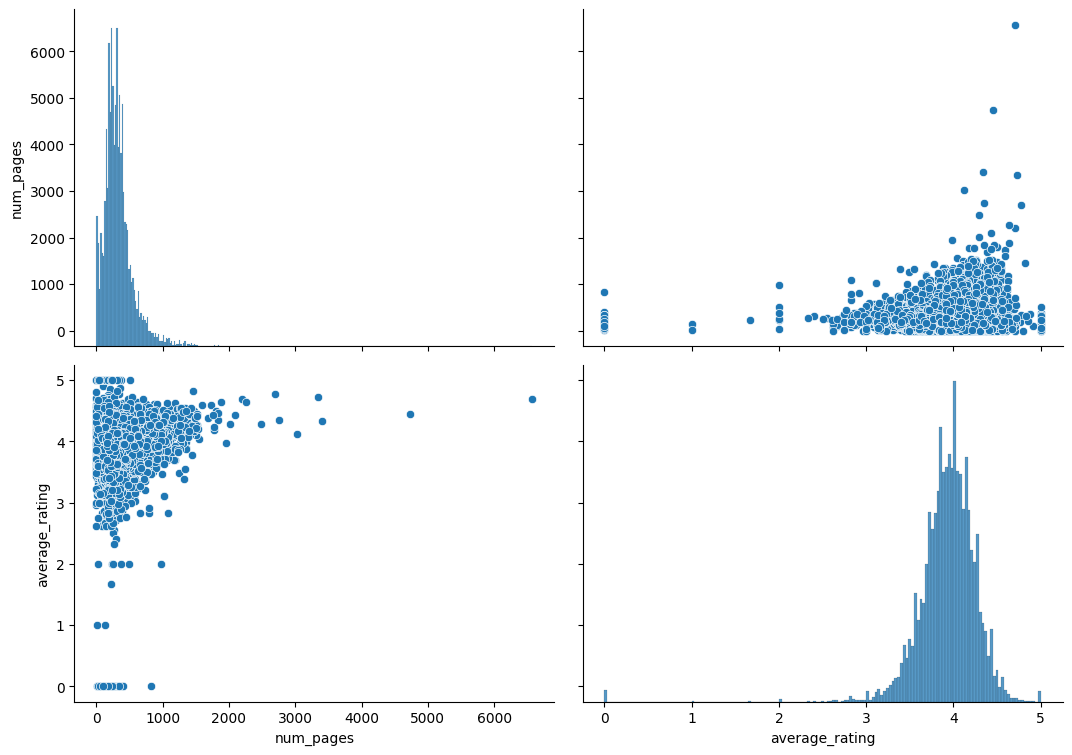

In [8]:
# Importa la librería seaborn como sns
import seaborn as sns

# Crea una lista con las variables a usar
numerical_variables = ['num_pages', 'average_rating']

# Genera una gráfca del tipo 'pairplot'
fig_pairplot = sns.pairplot(df[numerical_variables],diag_kind='auto',kind='scatter')

# Define el tamaño de la gráfica
fig_pairplot.fig.set_size_inches(12, 8)

### Ejercicio 6

**Ejercicio**: Genera una gráfica de tarta (pie chart) que muestre el reparto de idiomas en la colección de libros (Reemplaza `----` con el código adecuado).

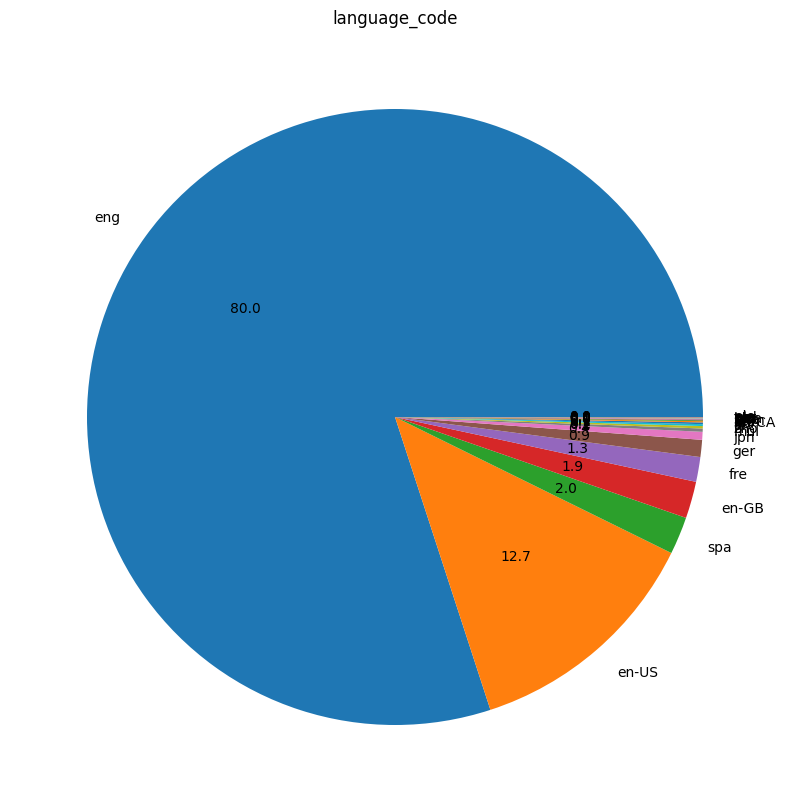

In [9]:
# Importa 'pyplot' como 'plt'
import matplotlib.pyplot as plt

# Define el esqueleto y el tamaño de la gráfica
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(15, 10)

# Genera un diagrama de tarta que muestre la distribución de idiomas de cada libro
df["language_code"].value_counts().rename("").plot.pie(autopct='%.1f', title="language_code");

### Ejercicio 7

**Ejercicio**: Crea un histograma de la variable objetivo: `average_rating`. Utiliza un total de 100 `bins` (Reemplaza `----` con el código adecuado).

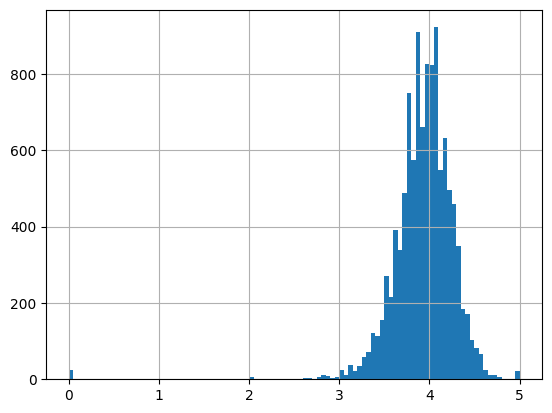

In [10]:
df.average_rating.hist(bins=100);

### Ejercicio 8

**Ejercicio**: Separa los datos en un conjunto de entrenamiento y otro de test donde el conjunto de test contiene el `20%` de los datos. Usa un `random_state` igual a `25`. Una vez generadas las matrices/vectores, imprime sus tipos y dimensiones en consola (Reemplaza `----` con el código adecuado)

In [11]:
# Creamos nuestra matriz de predictores eliminando la columna de nuestra variable objetivo.
X = df.drop(columns=["average_rating"], axis = 1)

# Creamos objeto tipo serie con nuestra variable objetivo)
y = df.average_rating

# Generamos nuestros conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=25)

# Imprimimos el tipo de cada matriz/vector en concola
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

print('--------------------------------------------')


# Imprimimos la dimensión de cada matriz/vector en concola
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
--------------------------------------------
(8857, 7)
(2215, 7)
(8857,)
(2215,)


### Ejercicio 9

**Ejercicio**: Hemos observado anteriormente que las variables `num_pages`y `ratings_count`contienen valores perdidos. En este ejercicio el objectivo es reemplazar estos valores perdidos con la media de los valores conocidos de cada variable. Para ello utilizaremos un objeto de tipo (`SimpleImputer`). Recuerda que para evitar 'data leakage' este objeto se crea sobre el conjunto de entrenamiento, antes de hacer las transformaciones pertinentes tanto en el conjunto de entrenamiento como en el conjunto de testeo (Reemplaza`----` con el código adecuado).

In [12]:
from sklearn.impute import SimpleImputer

# Crea una lista con las variables a usar
numerical_variables = ['num_pages','ratings_count']

# Creamos un SimpleImputer basado en la median (sklearn.impute.SimpleImputer)
imp_median = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median.fit(X_train[numerical_variables])

# Aplicamos el SimpleImputer al conjunto train
array_X_train_numerical= imp_median.transform(X_train[numerical_variables])
X_train[numerical_variables] = pd.DataFrame(array_X_train_numerical, columns=numerical_variables, index=X_train.index)

# Aplicamos el SimpleImputer al conjunto test
array_X_test_numerical= imp_median.transform(X_test[numerical_variables])
X_test[numerical_variables] = pd.DataFrame(array_X_test_numerical, columns=numerical_variables, index=X_test.index)

Axes(0.125,0.11;0.775x0.77)


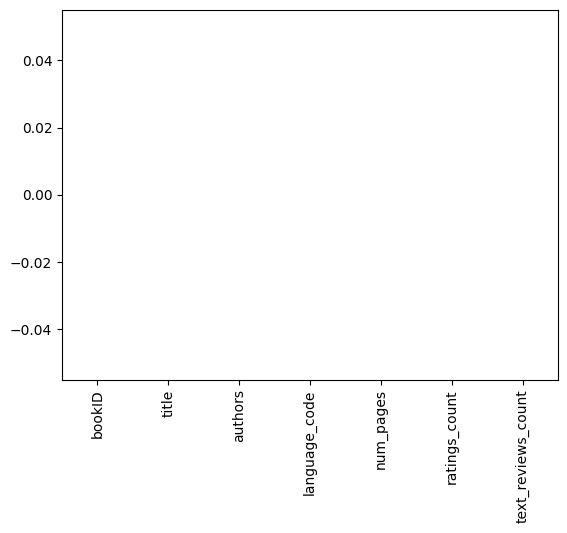

In [13]:
# Comprobamos que ya no existen valores perdidos en nuestro conjunto de entrenamiento:
print(X_train.isnull().sum().plot(kind="bar"));

Axes(0.125,0.11;0.775x0.77)


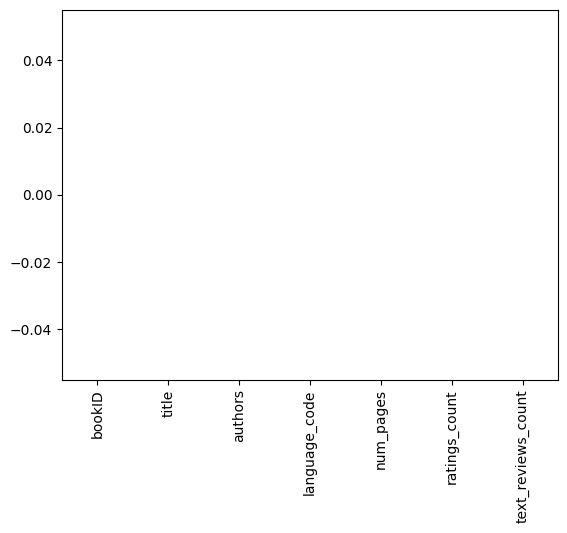

In [14]:
# Comprobamos que ya no existen valores perdidos en nuestro conjunto de testeo:
print(X_test.isnull().sum().plot(kind="bar"));

### Ejercicio 10

Con la función `describe()` podemos obtener cierta información estadística de nuestros datos. Aplicando esta función a la columna `num_pages`vemos lo siguiente:

In [15]:
df.num_pages.describe()

,num_pages
count,10960.000000
mean,336.263960
std,241.661254
min,0.000000
25%,192.000000
50%,298.000000
75%,416.000000
max,6576.000000


Los resultados nos muestran entre otras cosas los cuantiles. Por ejemplo, se puede observar que el 25% de los libros tiene entre 0 y 192 páginas. Vamos a usar esta información con el fin de transformar la variable `num_pages` en una variable categórica que segmenta los libros en los siguientes grupos:

- short: num_pages <= 192
- medium: 192 < num_pages <= 298
- large: 298 < num_pages <= 416
- super_large: num_pages > 416

**Ejercicio**: Crea la variable categórica anteriormente descrita y añádela tanto a `X_train` como a `X_test` bajo el nombre `num_pages_cat` (Reemplaza `----` con el código adecuado).

<ipython-input-18-74de59920871>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X.num_pages_cat.loc[X.num_pages <= 192] = "short"
<ipython-input-18-74de59920871>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

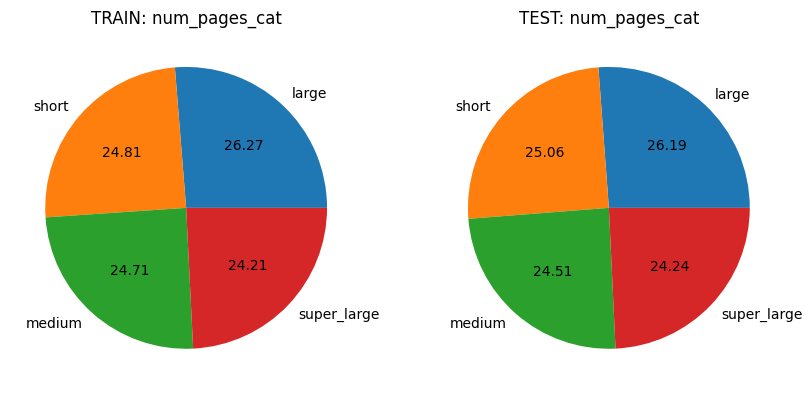

In [18]:
# Creamos la función introduce_num_pages_cat que toma como variable un dataframe
def introduce_num_pages_cat(X):
    X["num_pages_cat"] = ""
    X.num_pages_cat.loc[X.num_pages <= 192] = "short"
    X.num_pages_cat.loc[(X.num_pages > 192) & (X.num_pages <= 298)] = "medium"
    X.num_pages_cat.loc[(X.num_pages > 298) & (X.num_pages <= 416)] = "large"
    X.num_pages_cat.loc[(X.num_pages > 416)] = "super_large"
    return X

# Aplicamos la función tanto a X_train como a X_test
X_train = introduce_num_pages_cat(X_train)
X_test  = introduce_num_pages_cat(X_test)

# Usamos Pie Charts para comprobar que hemos creado la variable de forma correcta tanto en X_train como en X_test.
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
X_train["num_pages_cat"].value_counts().rename("").plot.pie(autopct='%.2f', ax=ax[0], title="TRAIN: num_pages_cat")
X_test["num_pages_cat"].value_counts().rename("").plot.pie(autopct='%.2f', ax=ax[1], title="TEST: num_pages_cat")
plt.show()


### Ejercicio 11

**Ejercicio**: En este ejercicio usaremos la funcionalidad del `MinMaxScaler` para escalar algunas de nuestra variables numéricas entre `0` y `1`. En este sentido, aplicaremos esta transformación a las columnas `num_pages`, `ratings_count`y `text_reviews_count` (Reemplaza `----` con el código adecuado).

In [23]:
# Importamos la clase  MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instanciamos el MinMaxScaler bajo el nombre "scaler".
scaler = MinMaxScaler()

# Definimos una lista con los nombres de las variables numéricas a normalizar.
cols = ['num_pages','ratings_count','text_reviews_count']

# Creamos una sub-selección de las columnas tanto sobre X_train como sobre X_test
X_train_sc = X_train[cols].copy()
X_test_sc  = X_test[cols].copy()

# Entrenamos el Scaler sobre el conjunto de entrenamiento
scaler.fit(X_train_sc)

# El objeto 'scaler' almacena los valores máximos y mínimos para hacer la transformación
X_min0 = pd.Series(scaler.data_min_, index=X_train_sc.columns)
X_max0 = pd.Series(scaler.data_max_, index=X_train_sc.columns)

print("MÍNIMOS: \n{}\n\nMÁXIMOS: \n{}".format(X_min0, X_max0))

print("\n\n" + "-"*50)
print("TRANSFORMACIÓN")
print("-"*50 + "\n")

# Aplicamos la transformación a TRAIN y TEST
X_train_sc.loc[:, :] = scaler.transform(X_train_sc)
X_test_sc.loc[:, :] = scaler.transform(X_test_sc)

print("TRAIN")
print("\nMÍNIMOS: \n{}\n\nMÁXIMOS: \n{}".format(X_train_sc.min(axis=0), X_train_sc.max(axis=0)))

print("\nTEST")
print("\nMÍNIMOS: \n{}\n\nMÁXIMOS: \n{}".format(X_test_sc.min(axis=0), X_test_sc.max(axis=0)))

# Finalmente, reemplazamos las columnas originales en X_train y X_test
X_train[cols] = X_train_sc
X_test[cols] = X_test_sc

# Exploramos las primeras 10 filas del conjunto de entrenamiento
X_train.head(10)

MÍNIMOS: 
num_pages             0.0
ratings_count         0.0
text_reviews_count    0.0
dtype: float64

MÁXIMOS: 
num_pages                6576.0
ratings_count         4597666.0
text_reviews_count      94265.0
dtype: float64


--------------------------------------------------
TRANSFORMACIÓN
--------------------------------------------------

TRAIN

MÍNIMOS: 
num_pages             0.0
ratings_count         0.0
text_reviews_count    0.0
dtype: float64

MÁXIMOS: 
num_pages             1.0
ratings_count         1.0
text_reviews_count    1.0
dtype: float64

TEST

MÍNIMOS: 
num_pages             0.0
ratings_count         0.0
text_reviews_count    0.0
dtype: float64

MÁXIMOS: 
num_pages             0.517032
ratings_count         0.344868
text_reviews_count    0.600477
dtype: float64


<ipython-input-23-e344fdd9b894>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[8.48671299e-04 7.30918156e-03 5.30419562e-05 ... 9.50511855e-03
 9.54755211e-05 4.46613271e-03]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train_sc.loc[:, :] = scaler.transform(X_train_sc)
<ipython-input-23-e344fdd9b894>:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.10751605e-02 1.29422373e-03 2.14289503e-03 ... 1.48517477e-04
 1.06083912e-05 1.16692304e-04]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test_sc.loc[:, :] = scaler.transform(X_test_sc)


,bookID,title,authors,language_code,num_pages,ratings_count,text_reviews_count,num_pages_cat
8919,34845,Mortal Fear,Robin Cook,eng,0.055353,0.000869,0.000849,large
9954,40303,Lost Boys,Orson Scott Card,eng,0.068127,0.001625,0.007309,super_large
3399,12461,Complete Plays 1913–1920,Eugene O'Neill/Travis Bogard,eng,0.168339,0.000019,0.000053,super_large
4502,16286,The Magus,John Fowles,eng,0.099757,0.008319,0.020315,super_large
6902,26123,Learned Optimism: How to Change Your Mind and ...,Martin E.P. Seligman,eng,0.048510,0.003021,0.006662,large
8528,32900,Perfect Match,Jodi Picoult,eng,0.055961,0.000046,0.000350,large
1270,4408,East of Eden,John Steinbeck,eng,0.091393,0.000857,0.004201,super_large
2730,10096,Mary Queen of Scots: Pride Passion and a Kin...,Jenny Wormald,eng,0.034063,0.000008,0.000064,medium
7958,30621,C.S. Lewis and the Catholic Church,Joseph Pearce,eng,0.026612,0.000036,0.000180,short
6585,24875,House of Stairs,William Sleator,eng,0.026764,0.000745,0.004742,short


### Ejercicio 12

**Ejercicio**: En este último ejercio el objectivo es usar el objeto `category_encoders.OneHotEncoder`con el fin de transformar la variable categórica `language_code` en un conjunto de variables tipo dummy (Reemplaza `----` con el código adecuado).

In [ ]:
# Importamos OneHotEncoder de la librería category_encoders
from category_encoders import OneHotEncoder

# Definimos una lista que contiene las variables que queremos transformar a dummies
list_columns_to_ohe = ['language_code']

# Creamos la instancia de OneHotEnconder
ohencoder = ce.OneHotEncoder(cols=list_columns_to_ohe, use_cat_names=True)

# Entrenamos el OneHotEncoder sobre X_train y transformamos X_train en un mismo paso
X_train = ohencoder.fit_transform(X_train)

# Transformamos X_test con el OneHotEncoder previamente entrenado
X_test = ohencoder.fit(X_test)

# Verificamos los nombres de las columnas de nuestro conjunto de entrenamiento. ¿Cuántas columnas tenemos?
print(X_train.columns)
print('------------------------------------')
print("Total Columns: ",  len(X_train.columns))